<a href="https://colab.research.google.com/github/VinithaNaidu/mnist-classification/blob/main/Exp_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

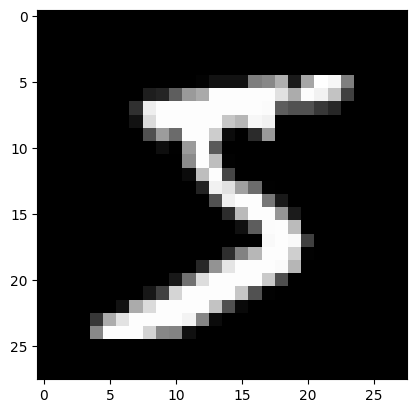

In [7]:
plt.imshow(single_image,cmap='gray')



In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:

X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:

X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

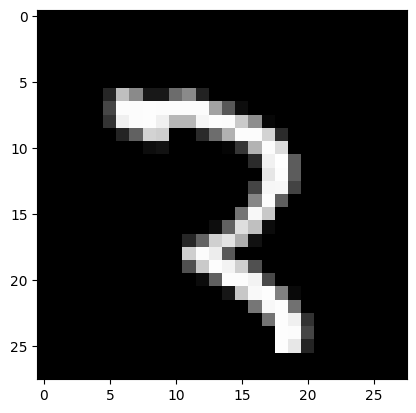

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [30]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [29]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          86,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,738 (342.73 KB)

 Trainable params: 87,738 (342.73 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [33]:
model.fit(X_train_scaled,y_train_onehot,epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.8042 - loss: 0.6329 - val_accuracy: 0.9640 - val_loss: 0.1195
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.9698 - loss: 0.1030 - val_accuracy: 0.9770 - val_loss: 0.0733
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9788 - loss: 0.0693 - val_accuracy: 0.9800 - val_loss: 0.0607
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9840 - loss: 0.0537 - val_accuracy: 0.9812 - val_loss: 0.0549
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.9864 - loss: 0.0451 - val_accuracy: 0.9833 - val_loss: 0.0513


In [34]:
metrics = pd.DataFrame(model.history.history)

In [58]:
print('Vinitha D')
print('212222230175')
metrics.head()

Vinitha D
212222230175


,accuracy,loss,val_accuracy,val_loss
0,0.908883,0.306380,0.9640,0.119486
1,0.972100,0.094821,0.9770,0.073256
2,0.979483,0.067168,0.9800,0.060678
3,0.983950,0.054207,0.9812,0.054890
4,0.986500,0.044576,0.9833,0.051348


Vinitha D
212222230175


<Axes: >

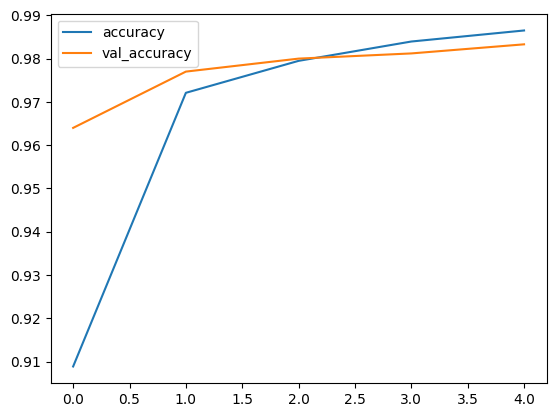

In [59]:
print('Vinitha D')
print('212222230175')
metrics[['accuracy','val_accuracy']].plot()

Vinitha D
212222230175


<Axes: >

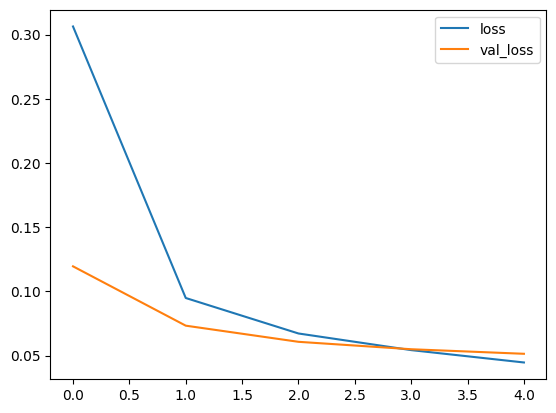

In [60]:
print('Vinitha D')
print('212222230175')
metrics[['loss','val_loss']].plot()

In [38]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [62]:
print('Vinitha D')
print('212222230175')
print(confusion_matrix(y_test,x_test_predictions))

Vinitha D
212222230175
[[ 977    0    0    1    0    0    1    0    1    0]
 [   0 1125    3    1    1    0    2    0    3    0]
 [   2    2 1009    3    4    0    2    6    4    0]
 [   0    0    0  994    0   11    0    1    3    1]
 [   0    0    0    0  976    0    2    0    1    3]
 [   2    0    0    2    0  882    6    0    0    0]
 [   6    2    0    0    4    2  942    0    2    0]
 [   1    2    9    6    3    1    0 1001    2    3]
 [   6    0    2    0    3    5    3    2  948    5]
 [   1    0    0    1   14    3    0    8    3  979]]


In [61]:
print('Vinitha D')
print('212222230175')
print(classification_report(y_test,x_test_predictions))

Vinitha D
212222230175
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [42]:
img = image.load_img('dp3.png')

In [43]:
type(img)

PIL.Image.Image

In [45]:
img = image.load_img('dp3.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [46]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [47]:
print(x_single_prediction)

[7]


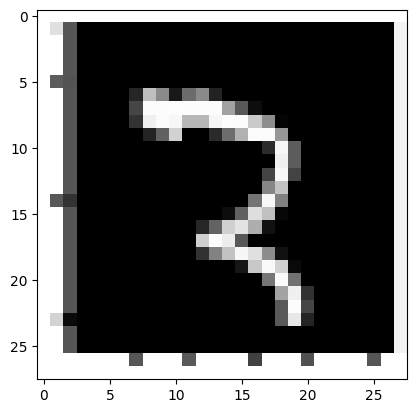

In [48]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [49]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [50]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [56]:
print('Vinitha D [212222230175]')
print(x_single_prediction)

Vinitha D [212222230175]
[3]
